## Ridge回帰のαの探索
- 正則化する際、適当なαはRidgeCV, LassoCV, ElasticNetCVを使うと、簡単に探索できる。

In [3]:
# 出力時に小数点以下3桁に
%precision 4
from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
# サンプルデータ
X, y = load_boston(True)

In [4]:
# αの探索
# CVはクロスバリデーションの意
# scoringパラメーターは評価関数の指定
# alphasパラメータはデフォルトで(0.1, 1.0, 10.0)
ridge = RidgeCV(scoring='r2')
ridge.fit(X, y)
ridge.alpha_

0.1

In [5]:
# さらにαの探索
ridge = RidgeCV([0.0001, 0.001, 0.01, 0.1], scoring='r2')
ridge.fit(X, y)
ridge.alpha_

0.0001

In [6]:
ridge.coef_

array([-1.0717e-01,  4.6395e-02,  2.0855e-02,  2.6885e+00, -1.7795e+01,
        3.8048e+00,  7.5016e-04, -1.4757e+00,  3.0565e-01, -1.2330e-02,
       -9.5345e-01,  9.3921e-03, -5.2547e-01])

In [7]:
float(r2_score(y, ridge.predict(X)))

0.7406

## Lassoのαの探索
- 

In [8]:
%matplotlib inline
# 出力時に小数点以下3桁に
%precision 3
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
# サンプルデータ
X, y = load_boston(True)

In [9]:
# αの確認
lasso = LassoCV()
lasso.fit(X, y)
float(lasso.alpha_)

0.725

In [10]:
# αの確認
# eps : αの値の最小値/αの値の最大値。デフォルトは0.001。epsを小さくすると探索範囲が広がる。
lasso = LassoCV(eps=0.0001)
lasso.fit(X, y)
float(lasso.alpha_)

0.139

In [11]:
# αの確認
# n_alphas : αの範囲の分割数
lasso = LassoCV(eps=0.0001, n_alphas=200)
lasso.fit(X, y)
float(lasso.alpha_)

0.145

In [12]:
# 係数の確認
lasso.coef_

array([-0.096,  0.049, -0.028,  0.236, -0.   ,  3.569, -0.007, -1.136,
        0.28 , -0.015, -0.779,  0.01 , -0.582])

In [13]:
# 平均二乗誤差の確認
float(mean_squared_error(y, lasso.predict(X)))

23.264

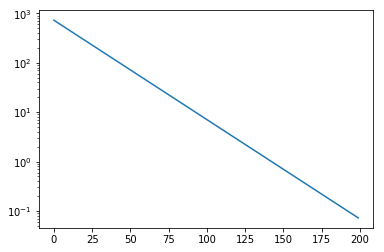

In [14]:
# αの探索リスト
plt.yscale('log')
plt.plot(lasso.alphas_);

## Elastic Netでの探索

In [15]:
# 出力時に小数点以下3桁に
%precision 3
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
# サンプルデータ
X, y = load_boston(True)

In [16]:
# l1_ratioの探索リスト
l1_ratio = np.arange(0.1, 1.1, 0.1)
l1_ratio

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [17]:
# l1_ratioとαの探索
enet = ElasticNetCV(l1_ratio=l1_ratio)
enet.fit(X, y)
float(enet.l1_ratio_), float(enet.alpha_)

(0.600, 1.208)

In [18]:
# αの探索リストの範囲
enet.alphas_.min(), enet.alphas_.max()

(0.7248204283772592, 7248.2042837725885)

In [19]:
# 平均二乗誤差
float(mean_squared_error(y, enet.predict(X)))

27.238

In [20]:
# l1_ratioとαの探索
enet = ElasticNetCV(l1_ratio=l1_ratio, eps=0.0001)
enet.fit(X, y)
float(enet.l1_ratio_), float(enet.alpha_)

(0.200, 0.479)

In [21]:
# αの探索リストの範囲
enet.alphas_.min(), enet.alphas_.max()

(0.07248204283772593, 7248.2042837725885)

In [22]:
# 平均二乗誤差
float(mean_squared_error(y, enet.predict(X)))

24.934

## パラメーター探索の確認

In [23]:
from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
# サンプルデータ
X, y = load_boston(True)

In [24]:
ridge = RidgeCV(alphas=[0.001, 0.01, 0.1], scoring='neg_mean_squared_error')
ridge.fit(X, y)
ridge_alpha = ridge.alpha_
float(ridge_alpha), float(mean_squared_error(y, ridge.predict(X)))

(0.010, 21.898)

In [25]:
lasso = LassoCV(eps=0.0001)
lasso.fit(X, y)
lasso_alpha = lasso.alpha_
float(lasso_alpha), float(mean_squared_error(y, lasso.predict(X)))

(0.139, 23.231)

In [28]:
enet = ElasticNetCV(eps=0.0001, l1_ratio=[0.1, 0.2, 0.3, 0.4, 0.5])
enet.fit(X, y)
enet_l1_ratio, enet_alpha = enet.l1_ratio_, enet.alpha_
float(enet_l1_ratio), float(enet_alpha), float(mean_squared_error(y, enet.predict(X)))

(0.200, 0.479, 24.934)